In [1]:
from pylab import *
from Bio import SeqIO
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP
import pandas as pd
import os
import re
import gzip
import shutil
import glob
import numpy as np
import scipy.stats as stats
import pylab as pl


In [99]:
df = pd.read_csv('MS_df.csv')   # read in the dataframe
df.fillna('', inplace=True)   # replace NaN with empty string


In [100]:
def dssp_file_df(file): # function to read in the dssp file and return a dataframe
    p = PDBParser() # create a PDB parser
    structure = p.get_structure(f"{file}", file) # get the structure from the PDB file
    model = structure[0]#  get the first model from the structure
    dssp = DSSP(model, file) # get the DSSP from the model
    df= pd.DataFrame(dssp)# create a dataframe from the DSSP
    df.columns = ["dssp index", "amino acid", "secondary structure", "relative ASA", "phi", "psi", "NH01R", "NH01E", "ONH1", "ONHE", "NH2R",
    "NO2E", "ONH2R", "ONH2E"] # naming the columns
    return df # return the dataframe

In [101]:
def dssp_df_calcualtion(df): # function to calculate the secondary structure and relative ASA
    relative_asa = [] # create a list to store the relative ASA
    secondary_structure = []    # create a list to store the secondary structure
    phi = []    # create a list to store the phi
    psi = []    # create a list to store the psi
    NH01R = []  # create a list to store the NH01R
    NH01E = []  # create a list to store the NH01E
    ONH1 = []   # create a list to store the ONH1
    ONHE = []   # create a list to store the ONHE
    NH2R = []   # create a list to store the NH2R
    NO2E = []   # create a list to store the NO2E
    ONH2R = []  # create a list to store the ONH2R
    ONH2E = []  # create a list to store the ONH2E



    for i,j in df.iterrows():   # loop through the dataframe
        filename= f'AF-{j["ProteinID"]}-F1-model_v2.pdb' # create the filename
        if filename in os.listdir('human_proteome/'):   # if the filename is in the human proteome folder
            print(filename)

            df_dssp= dssp_file_df(f'human_proteome/{filename}') # read in the dssp file
            if j['LastAA_position'] in df_dssp['dssp index']: # if the last AA position is in the dssp file
                relative_asa.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['relative ASA'].values[0]) # append the relative ASA
                secondary_structure.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['secondary structure'].values[0]) # append the secondary structure
                phi.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['phi'].values[0]) # append the phi
                psi.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['psi'].values[0]) # append the psi
                NH01R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH01R'].values[0]) # append the NH01R
                NH01E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH01E'].values[0]) # append the NH01E
                ONH1.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH1'].values[0])   # append the ONH1
                ONHE.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONHE'].values[0])   # append the ONHE
                NH2R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH2R'].values[0])   # append the NH2R
                NO2E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NO2E'].values[0])   # append the NO2E
                ONH2R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH2R'].values[0]) # append the ONH2R
                ONH2E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH2E'].values[0]) # append the ONH2E


            else: # if the last AA position is not in the dssp file
                relative_asa.append('') # append empty string
                secondary_structure.append('')
                phi.append('')
                psi.append('')
                NH01R.append('')
                NH01E.append('')
                ONH1.append('')
                ONHE.append('')
                NH2R.append('')
                NO2E.append('')
                ONH2R.append('')
                ONH2E.append('')
        else:   # if the filename is not in the human proteome folder
            relative_asa.append('') # append empty string
            secondary_structure.append('')  
            phi.append('')
            psi.append('')
            NH01R.append('')
            NH01E.append('')
            ONH1.append('')
            ONHE.append('')
            NH2R.append('')
            NO2E.append('')
            ONH2R.append('')
            ONH2E.append('')


    df['secondary_structure'] = secondary_structure # add the secondary structure to the dataframe
    df['relative ASA'] = relative_asa
    df['phi'] = phi
    df['psi'] = psi
    df['NH01R'] = NH01R
    df['NH01E'] = NH01E
    df['ONH1'] = ONH1
    df['ONHE'] = ONHE
    df['NH2R'] = NH2R
    df['NO2E'] = NO2E
    df['ONH2R'] = ONH2R
    df['ONH2E'] = ONH2E
    return df.to_csv('df_dssp.csv', index=False)   # return the dataframe to a csv file

In [ ]:
relative_asa = []
secondary_structure = []
phi = []
psi = []
NH01R = []
NH01E = []
ONH1 = []
ONHE = []
NH2R = []
NO2E = []
ONH2R = []
ONH2E = []



for i,j in df.iterrows():
    filename= f'AF-{j["ProteinID"]}-F1-model_v2.pdb' 
    if filename in os.listdir('human_proteome/'):
        print(filename)

        df_dssp= dssp_file_df(f'human_proteome/{filename}')
        if j['LastAA_position'] in df_dssp['dssp index']:
            relative_asa.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['relative ASA'].values[0])
            secondary_structure.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['secondary structure'].values[0])
            phi.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['phi'].values[0])
            psi.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['psi'].values[0])
            NH01R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH01R'].values[0])
            NH01E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH01E'].values[0])
            ONH1.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH1'].values[0])
            ONHE.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONHE'].values[0])
            NH2R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NH2R'].values[0])
            NO2E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['NO2E'].values[0])
            ONH2R.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH2R'].values[0])
            ONH2E.append(df_dssp[df_dssp['dssp index'] == j['LastAA_position']]['ONH2E'].values[0])


        else:
            relative_asa.append('')
            secondary_structure.append('')
            phi.append('')
            psi.append('')
            NH01R.append('')
            NH01E.append('')
            ONH1.append('')
            ONHE.append('')
            NH2R.append('')
            NO2E.append('')
            ONH2R.append('')
            ONH2E.append('')
    else:
        relative_asa.append('')
        secondary_structure.append('')  
        phi.append('')
        psi.append('')
        NH01R.append('')
        NH01E.append('')
        ONH1.append('')
        ONHE.append('')
        NH2R.append('')
        NO2E.append('')
        ONH2R.append('')
        ONH2E.append('')

In [ ]:
df['secondary_structure'] = secondary_structure
df['relative ASA'] = relative_asa
df['phi'] = phi
df['psi'] = psi
df['NH01R'] = NH01R
df['NH01E'] = NH01E
df['ONH1'] = ONH1
df['ONHE'] = ONHE
df['NH2R'] = NH2R
df['NO2E'] = NO2E
df['ONH2R'] = ONH2R
df['ONH2E'] = ONH2E
df.to_csv('df_dssp.csv', index=False)

In [ ]:
df['relative ASA'].replace('', np.nan, inplace=True)
df.dropna(subset=['relative ASA'], inplace=True)


In [ ]:
ss= pd.get_dummies(df.secondary_structure)
df= pd.concat([df, ss], axis=1)

In [ ]:
mod= pd.get_dummies(df.Modifications)
df= pd.concat([df, mod], axis=1)

In [117]:
df.to_csv('df_dssp_new.csv', index=False)

In [112]:
df

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage
0,AAAAAAAATMALAAPSSPTPESPTMLTK,Q9NQS7,Unmodified,127,154,AAAAAAAATMALAAPSSPTPESPTMLTK,K,154,0
1,AAAAAAAGDSDSWDADAFSVEDPVR,O75822,Acetyl (Protein N-term),2,26,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,0
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0
4,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,K,364,0
...,...,...,...,...,...,...,...,...,...
44349,YYTEFPTVLDITAEDPSK,O14929,Unmodified,263,280,YYTEFPTVLDITAEDPSK,K,280,0
44350,YYTGNYDQYVK,Q9UG63,Unmodified,305,315,YYTGNYDQYVK,K,315,0
44351,YYTLEEIQK,P00167,Unmodified,11,19,YYTLEEIQK,K,19,0
44352,YYTLFGR,P07814,Unmodified,1504,1510,YYTLFGR,R,1510,0


In [113]:
df_cleavage= df.loc[df['Cleavage'] == 0]
df_cleavage


,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage
0,AAAAAAAATMALAAPSSPTPESPTMLTK,Q9NQS7,Unmodified,127,154,AAAAAAAATMALAAPSSPTPESPTMLTK,K,154,0
1,AAAAAAAGDSDSWDADAFSVEDPVR,O75822,Acetyl (Protein N-term),2,26,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,0
3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0
4,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,K,364,0
5,AAAAAAGAASGLPGPVAQGLK,Q96P70,Acetyl (Protein N-term),2,22,AAAAAAGAASGLPGPVAQGLK,K,22,0
...,...,...,...,...,...,...,...,...,...
44349,YYTEFPTVLDITAEDPSK,O14929,Unmodified,263,280,YYTEFPTVLDITAEDPSK,K,280,0
44350,YYTGNYDQYVK,Q9UG63,Unmodified,305,315,YYTGNYDQYVK,K,315,0
44351,YYTLEEIQK,P00167,Unmodified,11,19,YYTLEEIQK,K,19,0
44352,YYTLFGR,P07814,Unmodified,1504,1510,YYTLFGR,R,1510,0


In [114]:
df_miss_cleavage= df.loc[df['Cleavage'] == 1]
df_miss_cleavage

,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage
2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1
12,AAAAECDVVMAATEPELLDDQEAKR,Q99615,Acetyl (Protein N-term),2,26,AAAAECDVVMAATEPELLDDQEAK,K,25,1
67,AAATPAKK,P19338,Unmodified,89,96,AAATPAK,K,95,1
113,AAEAAAAPAESAAPAAGEEPSKEEGEPK,P80723,Unmodified,122,149,AAEAAAAPAESAAPAAGEEPSK,K,143,1
117,AAEADGPLKR,O75352,Acetyl (Protein N-term),2,11,AAEADGPLK,K,10,1
...,...,...,...,...,...,...,...,...,...
44084,YSDDLLKK,Q5T6V5,Unmodified,254,261,YSDDLLK,K,260,1
44116,YSHVNKK,Q9UQE7,Unmodified,979,985,YSHVNK,K,984,1
44231,YVDEASKK,P62249,Unmodified,99,106,YVDEASK,K,105,1
44254,YVGKEPSGLR,O94925,Unmodified,308,317,YVGK,K,311,1


In [ ]:
df_cleavage = df_cleavage[df_cleavage['relative ASA'] != '']
df_cleavage

In [ ]:
df_miss_cleavage = df_miss_cleavage[df_miss_cleavage['relative ASA'] != '']
df_miss_cleavage

In [ ]:
Cleavage= []
for i in df_cleavage['relative ASA']:
    Cleavage.append(i)


h= sorted(Cleavage)

In [ ]:
Miss_cleavage= []
for j in df_miss_cleavage['relative ASA']:
    Miss_cleavage.append(j)


k= sorted(Miss_cleavage)

In [ ]:
print(len(Cleavage))
print(len(Miss_cleavage))

37820
4410


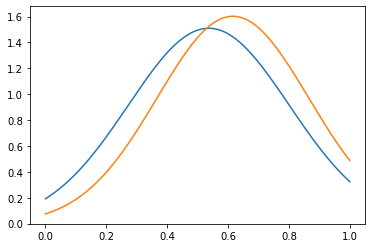

In [ ]:
hmean = np.mean(h)
kmean = np.mean(k)

hstd = np.std(h)
kstf= np.std(k)

pdf = stats.norm.pdf(h, hmean, hstd)
pdf1 = stats.norm.pdf(k, kmean, kstf)

plt.plot(h, pdf) 
plt.plot(k, pdf1)

plt.show()

In [ ]:
df['Last_AA'].value_counts()

K    27504
R    14712
F        4
L        2
H        2
Q        2
N        1
M        1
V        1
A        1
Name: Last_AA, dtype: int64

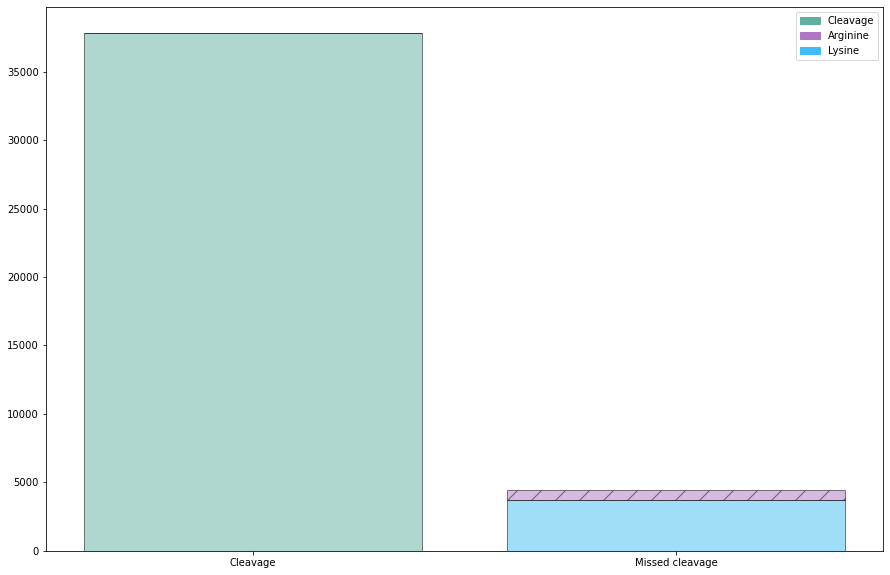

In [ ]:
import matplotlib.patches as mpatches

x= ['Cleavage', 'Missed cleavage']
y= [len(Cleavage), 3685]
y1= [1, 725]
plt.figure(figsize=(15, 10))
plt.bar(x, y, color=["#61afa1",'#42bcf5'], width=0.8, alpha=0.5, edgecolor='black', linewidth=1)
plt.bar(x, y1, color= "#b175c7", width=0.8, alpha=0.5, bottom=y, hatch='/', edgecolor='black', linewidth=1)

Cleavage1 = mpatches.Patch(color='#61afa1', label='Cleavage')
Lysine = mpatches.Patch(color='#b175c7', label='Arginine')
Arginine = mpatches.Patch(color='#42bcf5', label='Lysine')


plt.legend(handles= [Cleavage1, Lysine, Arginine])
plt.show()

In [ ]:
df_miss_cleavage['Last_AA'].value_counts()

K    3685
R     725
Name: Last_AA, dtype: int64

In [ ]:
from scipy.stats import ttest_ind

df1 = df[df['relative ASA'] != '']



cat1 = df1[df1['Cleavage']==0]
cat2 = df1[df1['Cleavage']==1]

ttest_ind(Cleavage, Miss_cleavage)

Ttest_indResult(statistic=-18.972008194375736, pvalue=6.256665134107635e-80)

In [ ]:
print(len(Cleavage))
print(len(Miss_cleavage))

37820
4410


In [2]:
df = pd.read_csv('df_dssp_new.csv')

In [3]:
df

,Unnamed: 0,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,...,T,2 Oxidation (M),3 Oxidation (M),Acetyl (Protein N-term),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified,res_depth,ca_depth
0,0,AAAAAAAATMALAAPSSPTPESPTMLTK,Q9NQS7,Unmodified,127,154,AAAAAAAATMALAAPSSPTPESPTMLTK,K,154,0,...,0,0,0,0,0,0,0,1,1.870620,1.999511
1,1,AAAAAAAGDSDSWDADAFSVEDPVR,O75822,Acetyl (Protein N-term),2,26,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,0,...,0,0,0,1,0,0,0,0,1.806878,1.999812
2,2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,...,0,0,0,1,0,0,0,0,1.806878,1.999812
3,3,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,K,K,27,0,...,0,0,0,1,0,0,0,0,1.916649,1.999362
4,4,AAAAAAALQAK,P36578,Unmodified,354,364,AAAAAAALQAK,K,364,0,...,0,0,0,0,0,0,0,1,1.903494,1.999405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42225,42225,YYTEFPTVLDITAEDPSK,O14929,Unmodified,263,280,YYTEFPTVLDITAEDPSK,K,280,0,...,0,0,0,0,0,0,0,1,1.890864,1.999755
42226,42226,YYTGNYDQYVK,Q9UG63,Unmodified,305,315,YYTGNYDQYVK,K,315,0,...,0,0,0,0,0,0,0,1,1.977119,1.999524
42227,42227,YYTLEEIQK,P00167,Unmodified,11,19,YYTLEEIQK,K,19,0,...,0,0,0,0,0,0,0,1,1.920681,1.999527
42228,42228,YYTLFGR,P07814,Unmodified,1504,1510,YYTLFGR,R,1510,0,...,0,0,0,0,0,0,0,1,3.268642,3.966887


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [5]:
print(df.columns)

Index(['Unnamed: 0', 'Sequence', 'ProteinID', 'Modifications', 'start', 'end',
       'cleavage_sites', 'Last_AA', 'LastAA_position', 'Cleavage',
       'secondary_structure', 'relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'I', 'S', 'T', '2 Oxidation (M)', '3 Oxidation (M)',
       'Acetyl (Protein N-term)', 'Acetyl (Protein N-term),2 Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)', 'Unmodified',
       'res_depth', 'ca_depth'],
      dtype='object')


In [200]:
#df= df.drop(['-', 'B', 'E', 'G',
#       'H', 'I', 'S', 'T', '2 Oxidation (M)', '3 Oxidation (M)',
#       'Acetyl (Protein N-term)', 'Acetyl (Protein N-term),2 Oxidation (M)',
#       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)', 'Unmodified',
#       '-', 'B', 'E', 'G', 'H', 'I', 'S', 'T', '2 Oxidation (M)',
#       '3 Oxidation (M)', 'Acetyl (Protein N-term)',
#       'Acetyl (Protein N-term),2 Oxidation (M)',
#       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)', 'Unmodified'], axis=1)

In [6]:
df_miss_cleavage= df.loc[df['Cleavage'] == 1]
len(df_miss_cleavage)

4410

In [7]:
df_cleavage= df.loc[df['Cleavage'] == 0]
len(df_cleavage)

37820

In [8]:
df_cleavage= df.loc[df['Cleavage'] == 0]
df_cleavage= df_cleavage.sample(n=4410)
df_test= pd.concat([df_miss_cleavage, df_cleavage])

In [255]:
df_test.to_csv('df_test.csv', index=False)

In [9]:
df_test

,Unnamed: 0,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,...,T,2 Oxidation (M),3 Oxidation (M),Acetyl (Protein N-term),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified,res_depth,ca_depth
2,2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,...,0,0,0,1,0,0,0,0,1.806878,1.999812
12,12,AAAAECDVVMAATEPELLDDQEAKR,Q99615,Acetyl (Protein N-term),2,26,AAAAECDVVMAATEPELLDDQEAK,K,25,1,...,0,0,0,1,0,0,0,0,2.055327,2.397385
67,67,AAATPAKK,P19338,Unmodified,89,96,AAATPAK,K,95,1,...,0,0,0,0,0,0,0,1,1.870708,1.999621
113,113,AAEAAAAPAESAAPAAGEEPSKEEGEPK,P80723,Unmodified,122,149,AAEAAAAPAESAAPAAGEEPSK,K,143,1,...,0,0,0,0,0,0,0,1,1.896769,1.999295
117,117,AAEADGPLKR,O75352,Acetyl (Protein N-term),2,11,AAEADGPLK,K,10,1,...,0,0,0,1,0,0,0,0,2.229631,2.893575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35406,35406,TELEDTLDTTAAQQELR,P35580,Unmodified,1153,1169,TELEDTLDTTAAQQELR,R,1169,0,...,0,0,0,0,0,0,0,1,1.944440,1.999742
19011,19011,KDQGELER,P35579,Unmodified,202,209,DQGELER,R,209,0,...,0,0,0,0,0,0,0,1,2.204297,2.321675
12600,12600,GAEIIVCTPGR,Q7L014,Unmodified,495,505,GAEIIVCTPGR,R,505,0,...,0,0,0,0,0,0,0,1,2.505170,1.999787
17409,17409,IMVDMLDSDGSGK,P17655,Oxidation (M),579,591,IMVDMLDSDGSGK,K,591,0,...,0,0,0,0,0,0,1,0,2.265451,2.950460


In [10]:
df_test['Cleavage'].value_counts()

0    4410
1    4410
Name: Cleavage, dtype: int64

In [258]:
x = df_test[['relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'I', 'S', 'T', '2 Oxidation (M)', '3 Oxidation (M)',
       'Acetyl (Protein N-term)', 'Acetyl (Protein N-term),2 Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)', 'Unmodified', 'res_depth', 'ca_depth', 'SASA']]
       
y = df_test['Cleavage']


In [259]:
len(df_test['Cleavage'])

8820

In [260]:
from sklearn.tree import plot_tree

In [261]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [262]:
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Accuracy:  0.6104308390022676


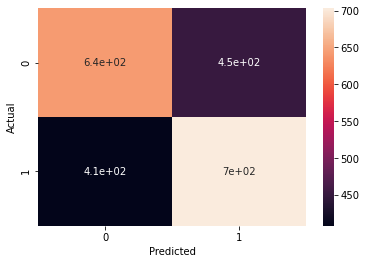

In [263]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

In [264]:
coloumn_names= ['relative ASA', 'phi', 'psi', 'NH01R', 'NH01E',
       'ONH1', 'ONHE', 'NH2R', 'NO2E', 'ONH2R', 'ONH2E', '-', 'B', 'E', 'G',
       'H', 'I', 'S', 'T', '2 Oxidation (M)', '3 Oxidation (M)',
       'Acetyl (Protein N-term)', 'Acetyl (Protein N-term),2 Oxidation (M)',
       'Acetyl (Protein N-term),Oxidation (M)', 'Oxidation (M)', 'Unmodified', 'res_depth', 'ca_depth', 'SASA']

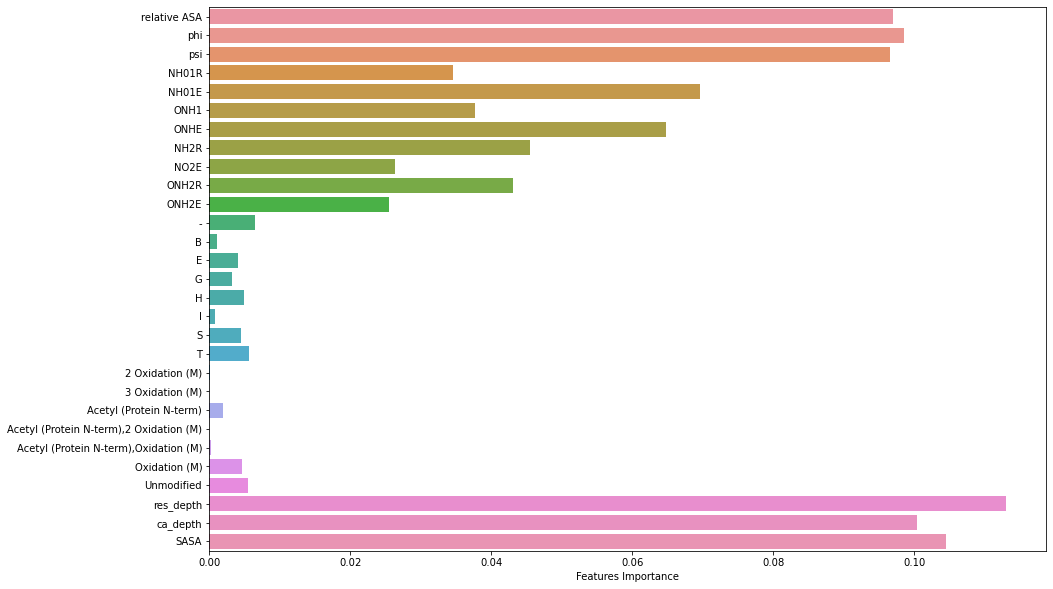

In [265]:
featureImportances = pd.Series(clf.feature_importances_)
plt.figure(figsize=(15, 10))
plt.xlabel('Features Importance')
sn.barplot(x=featureImportances, y=coloumn_names)
plt.show()



In [2]:
df_cleav= df_test.loc[df['Cleavage'] == 0]
df_cleav

NameError: name 'df_test' is not defined

In [139]:
df_mscleav= df_test.loc[df['Cleavage']== 1]
df_mscleav

,Unnamed: 0,Sequence,ProteinID,Modifications,start,end,cleavage_sites,Last_AA,LastAA_position,Cleavage,...,T,2 Oxidation (M),3 Oxidation (M),Acetyl (Protein N-term),"Acetyl (Protein N-term),2 Oxidation (M)","Acetyl (Protein N-term),Oxidation (M)",Oxidation (M),Unmodified,res_depth,ca_depth
2,2,AAAAAAAGDSDSWDADAFSVEDPVRK,O75822,Acetyl (Protein N-term),2,27,AAAAAAAGDSDSWDADAFSVEDPVR,R,26,1,...,0,0,0,1,0,0,0,0,1.806878,1.999812
12,12,AAAAECDVVMAATEPELLDDQEAKR,Q99615,Acetyl (Protein N-term),2,26,AAAAECDVVMAATEPELLDDQEAK,K,25,1,...,0,0,0,1,0,0,0,0,2.055327,2.397385
67,67,AAATPAKK,P19338,Unmodified,89,96,AAATPAK,K,95,1,...,0,0,0,0,0,0,0,1,1.870708,1.999621
113,113,AAEAAAAPAESAAPAAGEEPSKEEGEPK,P80723,Unmodified,122,149,AAEAAAAPAESAAPAAGEEPSK,K,143,1,...,0,0,0,0,0,0,0,1,1.896769,1.999295
117,117,AAEADGPLKR,O75352,Acetyl (Protein N-term),2,11,AAEADGPLK,K,10,1,...,0,0,0,1,0,0,0,0,2.229631,2.893575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41970,41970,YSDDLLKK,Q5T6V5,Unmodified,254,261,YSDDLLK,K,260,1,...,0,0,0,0,0,0,0,1,1.903294,1.999841
42002,42002,YSHVNKK,Q9UQE7,Unmodified,979,985,YSHVNK,K,984,1,...,1,0,0,0,0,0,0,1,1.870713,1.999677
42109,42109,YVDEASKK,P62249,Unmodified,99,106,YVDEASK,K,105,1,...,0,0,0,0,0,0,0,1,3.075515,4.129241
42132,42132,YVGKEPSGLR,O94925,Unmodified,308,317,YVGK,K,311,1,...,0,0,0,0,0,0,0,1,1.970803,2.446792


In [140]:
cleav_rsa= []
mscleav= []

for i in df_cleav['relative ASA']:
    cleav_rsa.append(i)

for j in df_mscleav['relative ASA']:
    mscleav.append(j)

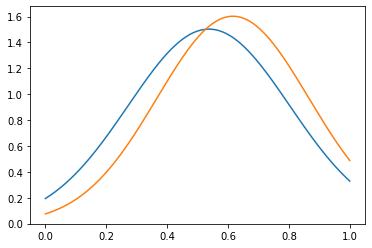

In [141]:
k= sorted(mscleav)
h= sorted(cleav_rsa)

hmean = np.mean(h)
kmean = np.mean(k)

hstd = np.std(h)
kstf= np.std(k)

pdf = stats.norm.pdf(h, hmean, hstd)
pdf1 = stats.norm.pdf(k, kmean, kstf)

plt.plot(h, pdf) 
plt.plot(k, pdf1)

plt.show()

In [142]:
from scipy.stats import ttest_ind

ttest_ind(cleav_rsa, mscleav)


Ttest_indResult(statistic=-14.382407062086468, pvalue=2.2289820790559052e-46)

In [ ]:
p = PDBParser(QUIET=True)
structure = p.get_structure("AF-A0A0A0MRZ7-F1-model_v2", "AF-A0A0A0MRZ7-F1-model_v2.pdb")
sr = ShrakeRupley()
sr.compute(structure[0], level="R")
my_list = []


for chain in structure[0]:
    for res in chain:
        my_list.append((res.get_resname(),round(res.sasa,2)))

In [150]:
from Bio.PDB.SASA import ShrakeRupley


def get_sasa(file):


    parser = PDBParser(QUIET=True) #Creates a parser object
    structure = parser.get_structure(f'{file}', file)   #Creates a structure object from the PDB file

    sasa = ShrakeRupley()
    sasa.compute(structure[0], level="R")

    my_list = [] #Creates a list to store the sasa values
    for chain in structure[0]: #Iterates through the chains in the structure
        for res in chain: #Iterates through the residues in the chain
            my_list.append((res.get_resname(),round(res.sasa,2))) #Appends the residue name and sasa value to the list
 
    aa_df= pd.DataFrame(my_list, columns=['Amino Acids', 'SASA']) #Creates a dataframe from the list
    aa_df['index'] = range(1, len(aa_df) + 1)   #Adds an index column to the dataframe


    amino_acids= {'VAL':'V', 'ILE':'I', 'LEU':'L', 'GLU':'E', 'GLN':'Q', 'ASP':'D', 'ASN':'N', 
    'HIS':'H', 'TRP':'W', 'PHE':'F', 'TYR':'Y', 'ARG':'R', 'LYS':'K', 'SER':'S', 'THR':'T', 
    'MET':'M', 'ALA':'A', 'GLY':'G', 'PRO':'P', 'CYS':'C'} #Creates a dictionary to map the amino acid abbreviation to the AA single letter code

    for key, value in amino_acids.items(): #Iterates through the dictionary
        aa_df['Amino Acids'] = aa_df['Amino Acids'].replace(key, value) #Replaces the abbreviation with the single letter code


    return aa_df #Returns the dataframe
        

In [151]:
proteinID= [] #List to store the protein IDs
for p in df['ProteinID']:  #Loop through the proteins in the data frame
    proteinID.append(p) #Append the protein ID to the list

proteins= set(proteinID)   #Convert the list to a set to remove duplicates
for k in proteins:  #Loop through the set of proteins
    filename= f'AF-{k}-F1-model_v2.pdb' #Create the filename
    if filename in os.listdir('human_proteome/'):   #Check if the file is in the directory
        print(filename)
        aa_df= get_sasa(f'human_proteome/{filename}')  #Run the get_sasa function on the file
        aa_df.to_csv(f'sasa/{filename}.csv')  #Save the dataframe to a csv file

AF-P15121-F1-model_v2.pdb
AF-Q6XUX3-F1-model_v2.pdb
AF-Q9Y4B5-F1-model_v2.pdb
AF-Q9H7B2-F1-model_v2.pdb
AF-Q9UPP1-F1-model_v2.pdb
AF-Q9Y291-F1-model_v2.pdb
AF-Q9H0J9-F1-model_v2.pdb
AF-P52735-F1-model_v2.pdb
AF-Q96TC7-F1-model_v2.pdb
AF-P29992-F1-model_v2.pdb
AF-P27635-F1-model_v2.pdb
AF-Q96T88-F1-model_v2.pdb
AF-P19388-F1-model_v2.pdb
AF-Q8WXD5-F1-model_v2.pdb
AF-Q9Y2X9-F1-model_v2.pdb
AF-O75323-F1-model_v2.pdb
AF-Q96A72-F1-model_v2.pdb
AF-O94905-F1-model_v2.pdb
AF-Q9H6R7-F1-model_v2.pdb
AF-Q9H3U1-F1-model_v2.pdb
AF-Q14353-F1-model_v2.pdb
AF-Q5SW96-F1-model_v2.pdb
AF-Q9UNF0-F1-model_v2.pdb
AF-Q969R2-F1-model_v2.pdb
AF-Q96CS3-F1-model_v2.pdb
AF-P07910-F1-model_v2.pdb
AF-Q4G0F5-F1-model_v2.pdb
AF-P09496-F1-model_v2.pdb
AF-Q8WVZ9-F1-model_v2.pdb
AF-P40763-F1-model_v2.pdb
AF-Q9BSJ2-F1-model_v2.pdb
AF-O00559-F1-model_v2.pdb
AF-Q8TAE8-F1-model_v2.pdb
AF-P27695-F1-model_v2.pdb
AF-P08962-F1-model_v2.pdb
AF-Q15118-F1-model_v2.pdb
AF-Q9UHL4-F1-model_v2.pdb
AF-Q12981-F1-model_v2.pdb
AF-O60508-F1

In [215]:
sasa_value= [] #List to store the sasa values
for i,j in df.iterrows():  #Loop through the dataframe
    file= f'AF-{j["ProteinID"]}-F1-model_v2.pdb.csv'    #Create the filename

    if file in os.listdir('sasa/'):   #Check if the file is in the directory
        aa_df= pd.read_csv(f'sasa/{file}')  #Read the csv file
        if j['LastAA_position'] in aa_df['index']:  #Check if the last amino acid position is in the dataframe
            sasa_value.append(aa_df.loc[aa_df['index'] == j['LastAA_position']]['SASA'].values[0]) #Append the sasa value to the list
        else:
            sasa_value.append('') #Append a blank value to the list
    else:
        sasa_value.append('')

df['SASA']= sasa_value #Add the sasa values to the dataframe


In [218]:
df_sasa= df

In [220]:
df_sasa.to_csv('sasa_dataframe.csv') #Save the dataframe to a csv file

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


: 

: 